In [7]:
import numpy as np
import random

def euclidean_distance(point1, point2):
    """Calculates the Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def initialize_centroids(data, k):
    """Randomly initializes the centroids."""
    centroids_idx = np.random.choice(data.index, k, replace=False)
    centroids = data.loc[centroids_idx].values
    # print('centroids:', centroids[:k])
    return centroids[:k]

def closest_centroid(point, centroids):
    """Finds the closest centroid to a point."""
    # print('point:', point)
    distances = [euclidean_distance(point, centroid) for centroid in centroids]
    # print('closest centroid:', distances)
    # print('np.argmin(distances):', np.argmin(distances))
    return np.argmin(distances)

def move_centroids(data, centroids, labels):
    """Moves the centroids to the mean of their assigned points."""
    new_centroids = []
    label = np.array(labels)
    for i in range(len(centroids)):
        label_index = np.where(label==i)[0]
        # print('label_index:', label_index)
        points = data.loc[label_index].values
        # print(f'points for move centroid: {points}, and length of points: {len(points)}')
        update_centroid = [sum(x)/len(points) for x in zip(*points)]
        # print('updated centroid:', update_centroid)
        new_centroids.append(update_centroid)
    return new_centroids

def k_means_clustering(data, k, max_iterations=1000):
    """Performs k-means clustering on the data."""
    # data.reset_index(inplace= True)
    centroids = initialize_centroids(data, k)
    # print('data index:', data.index)
    # print('data index length:', len(data.index))
    for _ in range(max_iterations):
        labels = [closest_centroid(data.loc[index].values, centroids) for index in data.index]
        # print('labels length:', len(labels))
        centroids = move_centroids(data, centroids, labels)
    return centroids, labels

def error_k_mean(data, centroids, labels):
    ''' calculate total error for a particular k'''
    sse = []
    label = np.array(labels)
    for i in range(len(centroids)):
        label_index = np.where(label==i)[0]
        # print('label_index:', label_index)
        points = data.loc[label_index].values
        error = [euclidean_distance(point, centroids[i]) for point in points]
        sse.append(np.array(error).sum())
    
    
    return np.array(sse).sum()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

error for k = 2 is 128.33666542899797
prediction accuracy: 0.5399218294207123
error for k = 3 is 97.22486903387323
prediction accuracy: 0.7163421126838476
error for k = 4 is 84.5560547355492
prediction accuracy: 0.6104082859586816
error for k = 5 is 78.0583947710467
prediction accuracy: 0.5012847991450682
error for k = 6 is 76.39183753549943
prediction accuracy: 0.4063691023040469
error for k = 7 is 68.96833378459586
prediction accuracy: 0.4864738155877396
error for k = 8 is 64.5309529346319
prediction accuracy: 0.45518543544622875
error for k = 9 is 60.782419322758855
prediction accuracy: 0.40280173183795037


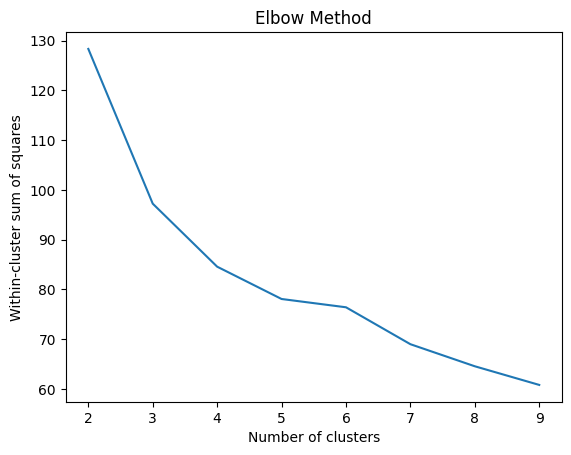

In [15]:
from sklearn.datasets import load_iris
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from termcolor import colored
iris=load_iris(as_frame=True)
# display(iris)
X = iris.data
y = iris.target
display(X)
display(y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 0)
error_for_k = []
for k in range(2,10):
    centroids, labels = k_means_clustering(X,k=k, max_iterations= 200)
    error = error_k_mean(data= X, centroids=centroids, labels=labels)
    print(f'error for k = {k} is {error}')
    error_for_k.append(error)
    ari = adjusted_rand_score(labels, y)
    print(colored('prediction accuracy:', 'red'), ari)

plt.plot(range(2,10), error_for_k)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

prediction accuracy: 0.96006671645913
